In [20]:
from pathlib import Path

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

### Add a few columns:
- one with an entry ID to the outlines
- one with an integer ID (will be needed when creating the glacier rasterized masks)
- one with the glacier area in km2 called `area_km2`

Data source: https://doi.org/10.1594/PANGAEA.909133


In [108]:
fp_raw = Path('../data/data_gmb/outlines_2015/c3s_gi_rgi11_s2_2015_v2/c3s_gi_rgi11_s2_2015_v2.shp')
s2_gdf = gpd.read_file(fp_raw)
s2_gdf['entry_id'] = s2_gdf.GLACIER_NR.apply(lambda x: f"g_{x:04d}")
s2_gdf['entry_id_i'] = s2_gdf.GLACIER_NR.astype(int)
s2_gdf = s2_gdf.rename(columns={'AREA_KM2': 'area_km2'})

# export
fp_out = Path(f"../data/outlines/paul_et_al_2020/{fp_raw.name}")
fp_out.parent.mkdir(parents=True, exist_ok=True)
s2_gdf.to_file(fp_out)

s2_gdf

/home/dcodrut/anaconda3/envs/dl4gam/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field Date create as date field, though DateTime requested.
  ogr_write(


,GLACIER_NR,LAT,LON,area_km2,ELEV_MIN,ELEV_MAX,ELEV_MEAN,ELEV_MED,SLOPE_MEAN,ASP_MEAN,...,Date,Funding,Analyst,O1_REGION,O2_REGION,Country,Footpr_ID,geometry,entry_id,entry_id_i
0,0,44.1138,7.42313,0.058371,2642.04,2864.04,2752.48,2765,26.8816,11.8563,...,2015-08-29,DARA/Levissima,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,29,"POLYGON Z ((373745.749 4886014.748 0, 373753.0...",g_0000,0
1,1,44.1217,7.40278,0.047933,2612.04,2769.04,2660.54,2653,31.6692,36.5235,...,2015-08-29,DARA/Levissima,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,29,"POLYGON Z ((372241.696 4886694.388 0, 372251.5...",g_0001,1
2,2,44.1205,7.41513,0.041097,2451.04,2692.04,2539.32,2508,34.2298,11.2966,...,2015-08-29,DARA/Levissima,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,29,"POLYGON Z ((373140 4886810 0, 373140 4886800 0...",g_0002,2
3,3,44.1255,7.38630,0.030849,2850.04,2979.04,2909.37,2909,40.3645,334.2890,...,2015-08-29,DARA/Levissima,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,29,"POLYGON Z ((370934.913 4887121.787 0, 370941.5...",g_0003,3
4,4,44.1262,7.39148,0.027961,2735.04,2930.04,2829.85,2813,31.7826,9.8094,...,2015-08-29,DARA/Levissima,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,29,"POLYGON Z ((371300 4887430 0, 371300 4887420 0...",g_0004,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390,4390,47.0707,12.70750,0.879276,2768.04,3625.04,3184.07,3186,30.1066,65.3642,...,2016-08-27,ESA_GLACIERS_CCI,G. Schwaizer; J. Nemec; ENVEO,Alps (11),Alps (11-01),AT,5,"POLYGON Z ((781490 5220340 0, 781490 5220330 0...",g_4390,4390
4391,4391,47.1373,12.72750,1.986310,2370.04,3326.04,2986.09,3034,19.3920,342.7750,...,2016-08-27,ESA_GLACIERS_CCI,G. Schwaizer; J. Nemec; ENVEO,Alps (11),Alps (11-01),AT,5,"POLYGON Z ((782288.561 5228290.32 0, 782297.03...",g_4391,4391
4392,4392,47.0316,13.02960,0.499875,2638.04,2969.04,2770.58,2759,21.4683,13.6304,...,2016-08-27,ESA_GLACIERS_CCI,G. Schwaizer; J. Nemec; ENVEO,Alps (11),Alps (11-01),AT,5,"POLYGON Z ((806608.878 5216622.9 0, 806611.99 ...",g_4392,4392
4393,4393,46.7723,10.82570,0.070869,3239.04,3383.04,3315.39,3320,21.5402,166.5850,...,2016-09-29,DARA/Levissima,"D. Fugazza, UNIMI",Alps (11),Alps (11-01),IT,15,"POLYGON Z ((639426.267 5181639.695 0, 639424.8...",g_4393,4393


### Combine the 3 debris-coverage products: SGI2016, Herreid and Pellicciotti 2020, Sherler et. al. 2018

Data sources:
- SGI2016: https://doi.glamos.ch/data/inventory/inventory_sgi2016_r2020.html
- Herreid and Pellicciotti 2020: https://zenodo.org/records/3866466
- Sherler et. al. 2018: http://doi.org/10.5880/GFZ.3.3.2018.005

The order is at follows:
- for CH, use SGI2016
- for other countries, use Herreid and Pelliciotti first, if it intersects the current glacier, otherwise use Sherler

In [101]:
debris_sgi = gpd.read_file('../data/data_gmb/debris/sgi_2016/SGI_2016_debriscover.shp').to_crs(s2_gdf.crs)
debris_sherler = gpd.read_file(
    '../data/data_gmb/debris/scherler_2018/11_rgi60_CentralEurope_S2_DC_2015_2017_mode.shp').to_crs(
    s2_gdf.crs)
debris_herreid = gpd.read_file(
    '../data/data_gmb/debris/herreid_and_pellicciotti_2020/suppl/S1/11CentralEurope/11CentralEurope_minGl1km2_debrisCover.shp').to_crs(
    s2_gdf.crs)

In [102]:
debris_sgi_o = debris_sgi.rename(columns={'sgi-id': 'entry_id'})[['entry_id', 'year_acq', 'geometry']].overlay(
    s2_gdf[s2_gdf.Country == 'CH'])
debris_sgi_o['area_km2_debris'] = debris_sgi_o.area / 1e6
debris_sgi_o['source_name'] = 'SGI-2016, GLAMOS'
debris_sgi_o

,entry_id_1,year_acq,GLACIER_NR,LAT,LON,area_km2,ELEV_MIN,ELEV_MAX,ELEV_MEAN,ELEV_MED,...,Analyst,O1_REGION,O2_REGION,Country,Footpr_ID,entry_id_2,entry_id_i,geometry,area_km2_debris,source_name
0,B55-19,2016,2935,46.0203,7.86390,1.098330,3036.04,3732.04,3382.14,3386,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,2935,2935,"POLYGON Z ((411328.488 5097425.525 0, 411324.1...",0.000054,"SGI-2016, GLAMOS"
1,B55-19,2016,2935,46.0203,7.86390,1.098330,3036.04,3732.04,3382.14,3386,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,2935,2935,"MULTIPOLYGON Z (((411293.397 5097480 0, 411290...",0.000010,"SGI-2016, GLAMOS"
2,A55f-01,2016,2995,46.4159,7.54255,0.328933,2608.04,3152.04,2850.77,2774,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,7,2995,2995,"MULTIPOLYGON Z (((387976.895 5141440.494 0, 38...",0.002178,"SGI-2016, GLAMOS"
3,B82-44,2016,802,45.9753,7.32291,0.351508,3157.04,3650.04,3422.88,3402,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,23,0802,802,"MULTIPOLYGON Z (((370312.707 5092372.189 0, 37...",0.000361,"SGI-2016, GLAMOS"
4,A54e-13,2016,3161,46.6918,8.44074,6.573550,2158.04,3476.04,2907.94,2956,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,3161,3161,"MULTIPOLYGON Z (((454366.57 5172747.72 0, 4543...",0.000451,"SGI-2016, GLAMOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,B30-28,2017,1592,46.4493,7.79022,0.542400,2899.04,3192.04,3068.16,3072,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,1592,1592,"POLYGON Z ((406967.557 5144965.333 0, 406972.5...",0.000386,"SGI-2016, GLAMOS"
3298,B30-28,2017,1592,46.4493,7.79022,0.542400,2899.04,3192.04,3068.16,3072,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,1592,1592,"POLYGON Z ((406994.24 5144923.671 0, 406987.81...",0.000227,"SGI-2016, GLAMOS"
3299,B30-28,2017,1592,46.4493,7.79022,0.542400,2899.04,3192.04,3068.16,3072,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,1592,1592,"POLYGON Z ((407294.27 5145064.843 0, 407293.06...",0.000551,"SGI-2016, GLAMOS"
3300,B30-28,2017,1592,46.4493,7.79022,0.542400,2899.04,3192.04,3068.16,3072,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,1592,1592,"POLYGON Z ((407264.767 5145129.546 0, 407261.9...",0.000132,"SGI-2016, GLAMOS"


In [103]:
debris_herreid['entry_id'] = debris_herreid['id'].apply(lambda x: f"hp_{x}")
debris_herreid_o = debris_herreid.rename(columns={'img_time': 'year_acq'})[
    ['entry_id', 'year_acq', 'geometry']].overlay(s2_gdf[s2_gdf.Country != 'CH'])
debris_herreid_o['area_km2_debris'] = debris_herreid_o.area / 1e6
debris_herreid_o['source_name'] = 'Herreid and Pellicciotti, 2020'

# drop the objects smaller than one pixel
debris_herreid_o = debris_herreid_o[debris_herreid_o.area_km2_debris >= 1e-4]
debris_herreid_o

,entry_id_1,year_acq,GLACIER_NR,LAT,LON,area_km2,ELEV_MIN,ELEV_MAX,ELEV_MEAN,ELEV_MED,...,Analyst,O1_REGION,O2_REGION,Country,Footpr_ID,entry_id_2,entry_id_i,geometry,area_km2_debris,source_name
0,hp_80,2011.64,4064,46.7805,11.01980,2.178060,2563.04,3396.04,2951.65,2933,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,4064,4064,"POLYGON Z ((654045.001 5183205.001 0, 654015.0...",0.012533,"Herreid and Pellicciotti, 2020"
2,hp_82,2011.64,4064,46.7805,11.01980,2.178060,2563.04,3396.04,2951.65,2933,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,4064,4064,"MULTIPOLYGON Z (((654675.001 5182734.445 0, 65...",0.027273,"Herreid and Pellicciotti, 2020"
3,hp_83,2011.64,4092,46.7812,10.94670,6.045350,2708.04,3463.04,3134.83,3157,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,4092,4092,"POLYGON Z ((649425.001 5183715.001 0, 649395.0...",0.000310,"Herreid and Pellicciotti, 2020"
4,hp_84,2011.64,4092,46.7812,10.94670,6.045350,2708.04,3463.04,3134.83,3157,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,4092,4092,"MULTIPOLYGON Z (((649443.808 5183720 0, 649458...",0.000465,"Herreid and Pellicciotti, 2020"
5,hp_85,2011.64,4360,46.7743,10.99420,7.872960,2523.04,3360.04,3006.31,3021,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,4360,4360,"MULTIPOLYGON Z (((653477.84 5183465.169 0, 653...",0.000677,"Herreid and Pellicciotti, 2020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,hp_1620,2015.66,3008,46.4090,8.30498,1.155660,2606.04,3163.04,2870.50,2849,...,R.S. Azzoni; UNIMI,Alps (11),Alps (11-01),IT,10,3008,3008,"MULTIPOLYGON Z (((446773.578 5139460.5 0, 4467...",0.013707,"Herreid and Pellicciotti, 2020"
989,hp_1963,2011.64,4047,46.8105,11.05650,0.884982,2518.04,3150.04,2872.89,2910,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,4047,4047,"MULTIPOLYGON Z (((656292.799 5187046.487 0, 65...",0.000252,"Herreid and Pellicciotti, 2020"
990,hp_1964,2011.64,4047,46.8105,11.05650,0.884982,2518.04,3150.04,2872.89,2910,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,4047,4047,"MULTIPOLYGON Z (((656292.799 5187046.487 0, 65...",0.000252,"Herreid and Pellicciotti, 2020"
991,hp_1965,2013.68,4047,46.8105,11.05650,0.884982,2518.04,3150.04,2872.89,2910,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,4047,4047,"MULTIPOLYGON Z (((656292.799 5187046.487 0, 65...",0.000108,"Herreid and Pellicciotti, 2020"


In [104]:
# Sherler et. al. do not provide the exact dates of the image. They used Landsat observations over 2013-2017 and Sentinel-2 over 2015-2017. So we will assume 2016 as an average.
debris_sherler['year_acq'] = 2016
debris_sherler_o = debris_sherler.rename(columns={'RGIId': 'entry_id'})[['entry_id', 'year_acq', 'geometry']].overlay(
    s2_gdf[s2_gdf.Country != 'CH'], keep_geom_type=False)
debris_sherler_o['area_km2_debris'] = debris_sherler_o.area / 1e6
debris_sherler_o['source_name'] = 'Sherler et. al., 2018'

# drop the objects smaller than one pixel
debris_sherler_o = debris_sherler_o[debris_sherler_o.area_km2_debris >= 1e-4]
debris_sherler_o

,entry_id_1,year_acq,GLACIER_NR,LAT,LON,area_km2,ELEV_MIN,ELEV_MAX,ELEV_MEAN,ELEV_MED,...,Analyst,O1_REGION,O2_REGION,Country,Footpr_ID,entry_id_2,entry_id_i,geometry,area_km2_debris,source_name
0,RGI60-11.00452,2016,3438,47.0170,11.86390,3.206690,2515.04,3312.04,2945.69,2947,...,G. Schwaizer; J. Nemec; ENVEO,Alps (11),Alps (11-01),AT,5,3438,3438,"MULTIPOLYGON Z (((715650 5210311.868 0, 715646...",0.000541,"Sherler et. al., 2018"
1,RGI60-11.00158,2016,3579,47.1056,12.45070,0.111354,2606.04,2821.04,2699.41,2696,...,G. Schwaizer; J. Nemec; ENVEO,Alps (11),Alps (11-01),AT,5,3579,3579,"MULTIPOLYGON Z (((761623.211 5222600 0, 761620...",0.000611,"Sherler et. al., 2018"
4,RGI60-11.00070,2016,3449,47.1487,12.10530,1.570890,2389.04,3132.04,2760.10,2770,...,G. Schwaizer; J. Nemec; ENVEO,Alps (11),Alps (11-01),AT,5,3449,3449,"MULTIPOLYGON Z (((735332.302 5226085.97 0, 735...",0.109288,"Sherler et. al., 2018"
5,RGI60-11.03582,2016,657,45.9098,6.92282,0.045334,2405.04,2560.04,2468.58,2464,...,Antoine Rabatel; IGE,Alps (11),Alps (11-01),FR,22,0657,657,"MULTIPOLYGON Z (((338950 5086023.279 0, 338944...",0.000249,"Sherler et. al., 2018"
6,RGI60-11.02484,2016,1235,46.1544,10.48590,0.305040,2796.04,3091.04,2907.20,2896,...,"D. Fugazza, UNIMI",Alps (11),Alps (11-01),IT,15,1235,1235,"MULTIPOLYGON Z (((614290 5112060 0, 614290 511...",0.003947,"Sherler et. al., 2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,RGI60-11.00359,2016,2834,47.0387,12.20570,0.136972,2571.04,2990.04,2759.12,2752,...,"D. Fugazza, UNIMI",Alps (11),Alps (11-01),IT,17,2834,2834,"MULTIPOLYGON Z (((743655.32 5214508.335 0, 743...",0.000314,"Sherler et. al., 2018"
2222,RGI60-11.00288,2016,3926,47.0931,11.07710,0.074649,2996.04,3153.04,3077.54,3077,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,4,3926,3926,"MULTIPOLYGON Z (((657620 5217440 0, 657620 521...",0.004901,"Sherler et. al., 2018"
2223,RGI60-11.00544,2016,4238,46.9942,10.77990,0.076508,2700.04,2859.04,2759.55,2757,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,4,4238,4238,"MULTIPOLYGON Z (((635480 5206160 0, 635477.69 ...",0.000410,"Sherler et. al., 2018"
2224,RGI60-11.00729,2016,4100,46.8837,10.87830,1.018990,2973.04,3728.04,3310.15,3285,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,14,4100,4100,"POLYGON Z ((643710 5193960 0, 643710 5193990.8...",0.000134,"Sherler et. al., 2018"


In [105]:
debris_final = pd.concat(
    [debris_sgi_o, debris_herreid_o, debris_sherler_o[~debris_sherler_o.GLACIER_NR.isin(debris_herreid_o.GLACIER_NR)]])
debris_final = debris_final.rename(columns={'entry_id_1': 'entry_id_debris', 'entry_id_2': 'entry_id'})
debris_final

,entry_id_debris,year_acq,GLACIER_NR,LAT,LON,area_km2,ELEV_MIN,ELEV_MAX,ELEV_MEAN,ELEV_MED,...,Analyst,O1_REGION,O2_REGION,Country,Footpr_ID,entry_id,entry_id_i,geometry,area_km2_debris,source_name
0,B55-19,2016.0,2935,46.0203,7.86390,1.098330,3036.04,3732.04,3382.14,3386,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,2935,2935,"POLYGON Z ((411328.488 5097425.525 0, 411324.1...",0.000054,"SGI-2016, GLAMOS"
1,B55-19,2016.0,2935,46.0203,7.86390,1.098330,3036.04,3732.04,3382.14,3386,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,2935,2935,"MULTIPOLYGON Z (((411293.397 5097480 0, 411290...",0.000010,"SGI-2016, GLAMOS"
2,A55f-01,2016.0,2995,46.4159,7.54255,0.328933,2608.04,3152.04,2850.77,2774,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,7,2995,2995,"MULTIPOLYGON Z (((387976.895 5141440.494 0, 38...",0.002178,"SGI-2016, GLAMOS"
3,B82-44,2016.0,802,45.9753,7.32291,0.351508,3157.04,3650.04,3422.88,3402,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,23,0802,802,"MULTIPOLYGON Z (((370312.707 5092372.189 0, 37...",0.000361,"SGI-2016, GLAMOS"
4,A54e-13,2016.0,3161,46.6918,8.44074,6.573550,2158.04,3476.04,2907.94,2956,...,"Y. Schaub, R. Le Bris, F. Paul, P. Rastner; UZH",Alps (11),Alps (11-01),CH,9,3161,3161,"MULTIPOLYGON Z (((454366.57 5172747.72 0, 4543...",0.000451,"SGI-2016, GLAMOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,RGI60-11.03319,2016.0,195,44.9647,6.32501,0.358557,2970.04,3513.04,3205.47,3200,...,Antoine Rabatel; IGE,Alps (11),Alps (11-01),FR,27,0195,195,"MULTIPOLYGON Z (((288945.148 4983090 0, 288945...",0.059378,"Sherler et. al., 2018"
2221,RGI60-11.00359,2016.0,2834,47.0387,12.20570,0.136972,2571.04,2990.04,2759.12,2752,...,"D. Fugazza, UNIMI",Alps (11),Alps (11-01),IT,17,2834,2834,"MULTIPOLYGON Z (((743655.32 5214508.335 0, 743...",0.000314,"Sherler et. al., 2018"
2222,RGI60-11.00288,2016.0,3926,47.0931,11.07710,0.074649,2996.04,3153.04,3077.54,3077,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,4,3926,3926,"MULTIPOLYGON Z (((657620 5217440 0, 657620 521...",0.004901,"Sherler et. al., 2018"
2223,RGI60-11.00544,2016.0,4238,46.9942,10.77990,0.076508,2700.04,2859.04,2759.55,2757,...,"G. Schwaizer, J. Nemec; ENVEO",Alps (11),Alps (11-01),AT,4,4238,4238,"MULTIPOLYGON Z (((635480 5206160 0, 635477.69 ...",0.000410,"Sherler et. al., 2018"


Debris coverage percentages for all:
#glaciers = 2663
total glacier area = 1676.15 km2
total debris area = 135.82 km2 (=> 8.10%)



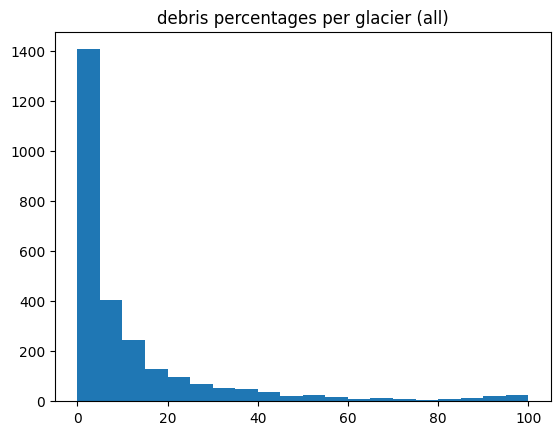

Debris coverage percentages for CH:
#glaciers = 917
total glacier area = 804.13 km2
total debris area = 62.26 km2 (=> 7.74%)

Debris coverage percentages for CH > 0.1 km2:
#glaciers = 473
total glacier area = 787.36 km2
total debris area = 58.94 km2 (=> 7.49%)

Debris coverage percentages for CH > 0.1 km2 and > 1%:
#glaciers = 306
total glacier area = 607.43 km2
total debris area = 58.39 km2 (=> 9.61%)



In [106]:
# check the debris coverage percentages for:
#  1) all glaciers 
#  2) CH glaciers 
#  3) CH glaciers larger than 0.1 km2 
#  4) CH glaciers larger than 0.1 km2 and with debris coverage more than 1% (this will be used in the paper)

debris_prc = debris_final.groupby('entry_id').area_km2_debris.sum() / debris_final.groupby('entry_id').area_km2.first()
gdf_list = {
    'all': debris_final,
    'CH': debris_final[debris_final.Country == 'CH'],
    'CH > 0.1 km2': debris_final[(debris_final.Country == 'CH') & (debris_final.area_km2 >= 0.1)],
    'CH > 0.1 km2 and > 1%': debris_final[
        (debris_final.Country == 'CH') &
        (debris_final.area_km2 >= 0.1) &
        debris_final.entry_id.isin(list(debris_prc[debris_prc >= 0.01].index))
    ]
}

for name, _gdf in gdf_list.items():
    areas_gl = _gdf.groupby('entry_id').area_km2.first()
    areas_debris = _gdf.groupby('entry_id').area_km2_debris.sum()
    debris_prc = areas_debris / areas_gl * 100

    print(f"Debris coverage percentages for {name}:")
    print(f"#glaciers = {_gdf.entry_id.nunique()}")
    print(f"total glacier area = {areas_gl.sum():.2f} km2")
    print(f"total debris area = {areas_debris.sum():.2f} km2 (=> {areas_debris.sum() / areas_gl.sum() * 100:.2f}%)")
    print()

    if name == 'all':
        plt.figure(dpi=100)
        plt.hist(debris_prc, bins=20)
        plt.title(f'debris percentages per glacier ({name})')
        plt.show()

In [107]:
fp_out = Path('../data/outlines/debris_multisource/debris_multisource.shp')
fp_out.parent.mkdir(parents=True, exist_ok=True)
debris_final['geometry'] = debris_final.buffer(0)  # fix invalid geometries

# rename columns (max 10 characters)
debris_final = debris_final.rename(columns={
    'entry_id_debris': 'entry_id_d',
    'area_km2_debris': 'debris_km2',
    'source_name': 'source'
})
debris_final.to_file(fp_out)

/home/dcodrut/anaconda3/envs/dl4gam/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field Date create as date field, though DateTime requested.
  ogr_write(
